                                  Hours_Studied  Previous_Scores  Sleep_Hours  \
Hours_Studied                          1.000000        -0.012390     0.001245   
Previous_Scores                       -0.012390         1.000000     0.005944   
Sleep_Hours                            0.001245         0.005944     1.000000   
Sample_Question_Papers_Practiced       0.017463         0.007888     0.003990   
Performance_Index                      0.373730         0.915189     0.048106   

                                  Sample_Question_Papers_Practiced  \
Hours_Studied                                             0.017463   
Previous_Scores                                           0.007888   
Sleep_Hours                                               0.003990   
Sample_Question_Papers_Practiced                          1.000000   
Performance_Index                                         0.043268   

                                  Performance_Index  
Hours_Studied                         

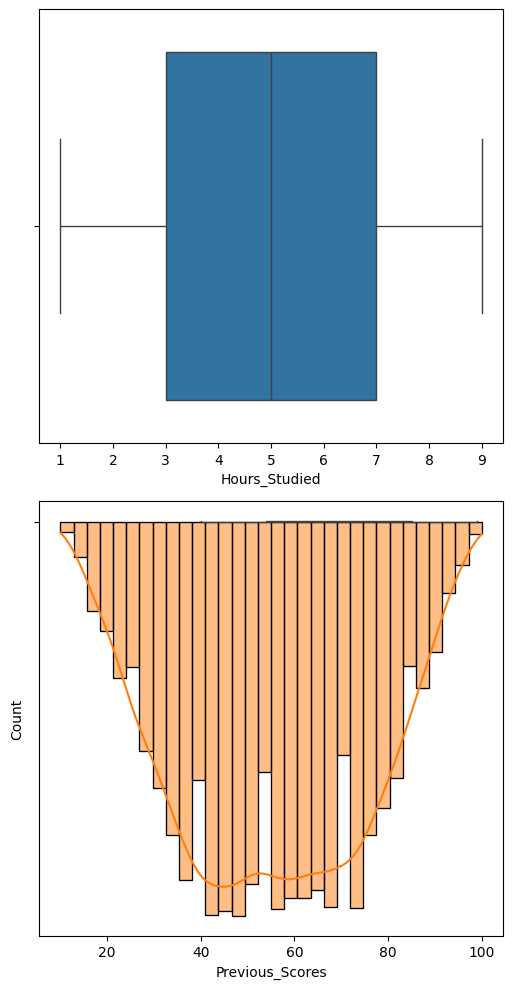

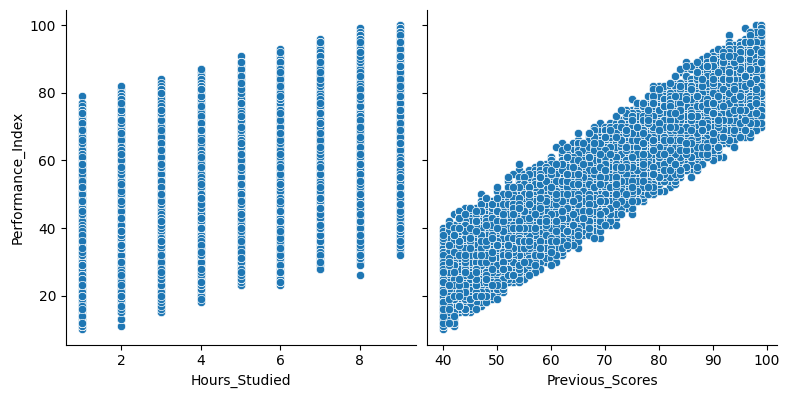

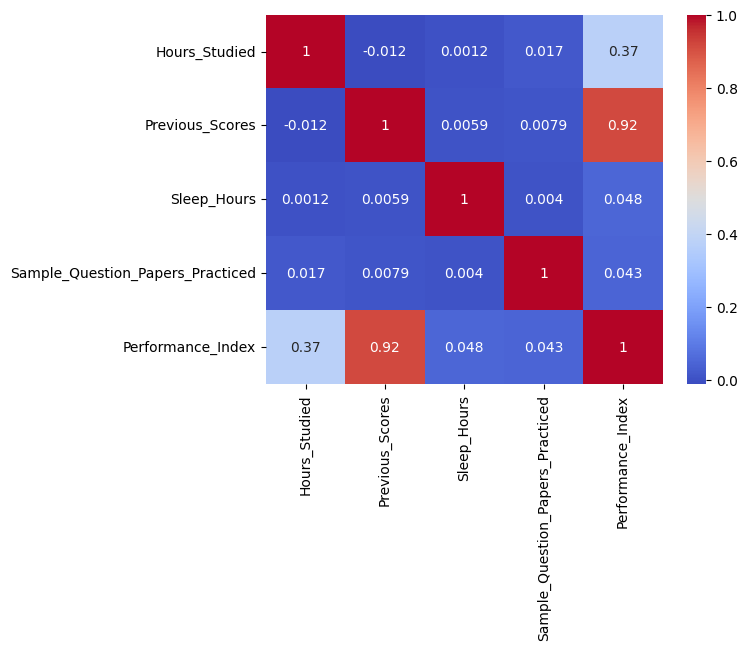

Intercept:  -29.759696031285607
[('Hours_Studied', np.float64(2.8458785973597283)), ('Previous_Scores', np.float64(1.0192750395624741))]
Prediction for test set: [65.62826464 49.70329949 34.41417389 ... 71.9558614  35.22150241
 14.87645919]
      Actual value  Predicted value
8018            65        65.628265
9225            51        49.703299
3854            35        34.414174
2029            97        92.896287
3539            87        84.530140
...            ...              ...
4208            69        67.242922
5335            60        58.705286
2554            73        71.955861
13              33        35.221502
4468            15        14.876459

[3000 rows x 2 columns]
Mean Absolute Error: 1.8372246647574142
Mean Square Error: 5.3409802420571
Root Mean Square Error: 2.3110560880379127


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

# Load the dataset
df = pd.read_csv("Student_Performance.csv")
print(df.corr(numeric_only=True))  # Use numeric_only=True to only get numeric correlations
print(df.describe())

# Setting the value for X and y
X = df[['Hours_Studied', 'Previous_Scores']]  # Adjusted features
y = df['Performance_Index']  # Adjusted target variable

# Visualizing the features
fig, axs = plt.subplots(2, figsize=(5, 10))  # Adjusted height for better spacing
plt1 = sns.boxplot(x=df['Hours_Studied'], ax=axs[0])  # Adjusted for the new feature
plt2 = sns.boxplot(x=df['Previous_Scores'], ax=axs[1])  # Adjusted for the new feature
plt.tight_layout()

sns.histplot(df['Performance_Index'], kde=True)  # Changed to histplot with kde for better visualization

sns.pairplot(df, x_vars=['Hours_Studied', 'Previous_Scores'], y_vars='Performance_Index', height=4, aspect=1, kind='scatter')
plt.show()

# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Use numeric_only=True for heatmap
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

# Printing the model coefficients
print('Intercept: ', reg_model.intercept_)
# Pair the feature names with the coefficients
print(list(zip(X.columns, reg_model.coef_)))  # Corrected to use .columns for feature names

# Predicting the Test and Train set result 
y_pred = reg_model.predict(X_test)  
x_pred = reg_model.predict(X_train)  # This is actually predicting on the train set

print("Prediction for test set: {}".format(y_pred))

# Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(reg_model_diff)  # Added print to display the DataFrame

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(mse)  # Changed to use mse instead of mean_squared_error directly

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)